In [ ]:
%%capture
##############################################################################
# IGNORE if you are running on a local machine and have all the dependencies #
##############################################################################

# installing dependencies --- to be able to run on google colab
# it would take 2-3 minutes

!yes | pip3 uninstall pandas
!yes | pip3 uninstall geopandas

!apt-get install libspatialindex-c4v5;
!pip3 install Rtree;
!pip3 install osmnx;
!pip3 install tqdm;
!pip3 install ipyleaflet;
!pip3 install pandas==1.0.4
!pip3 install geopandas==0.7.0

In [48]:
import networkx as nx
import osmnx as ox
import random
import itertools

`networkx` supports a lot of graph types: simple graph, simple digraph (parallel edges are not acceptable), multidigraph, multigraphs. Read more [here](https://networkx.github.io/documentation/stable/reference/classes/index.html).

For sure, we want to use multidigraph to handle our maps

In [9]:
G = nx.MultiDiGraph()

In [30]:
# add arbitrary nodes
nodes = [i for i in range(1,20)]

In [31]:
G.add_nodes_from(nodes)

In [32]:
num_edges = 70
for _ in range(num_edges):
    u = random.randint(1, 101)
    v = random.randint(1,101)
    G.add_edge(u, v, weight = 5)

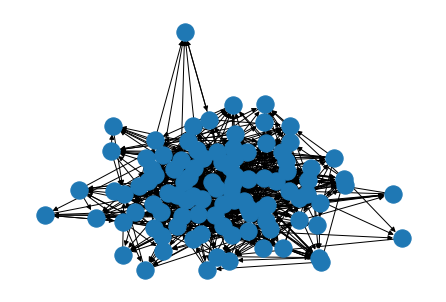

In [33]:
nx.draw(G)

One thing that you have probably noticed that the graph that was returned by `osmnx` in the first tutorial could be dealt with as if it was a pure vanilla `networkx` graph.

That is a very good news for us, because we can use [`networkx` utilities and algorithms](https://networkx.github.io/documentation/stable/reference/algorithms/index.html) to do calculation. 

We will show a couple of algorithms on `G` graph and then download an actual map and play with it a little bit.

In [34]:
nx.number_strongly_connected_components(G)

1

In [42]:
# we will take the first 10 simple cycles
for cycle in itertools.islice(nx.simple_cycles(G), 10):
    print(cycle)

[5]
[57]
[30]
[26]
[67]
[1, 53, 2, 76, 23, 89, 55, 16, 6]
[1, 53, 2, 76, 23, 89, 55, 16, 6, 54, 70, 52, 101, 99, 97, 7, 51, 73]
[1, 53, 2, 76, 23, 89, 55, 16, 6, 54, 70, 52, 101, 99, 97, 7, 51, 73, 83, 44, 10, 31, 85, 36, 39, 74, 82, 87, 93, 43, 11, 98, 13, 60, 40, 49, 58, 22, 91, 100, 92, 47, 24, 14, 20, 4, 78, 33, 75, 96, 32, 37, 57, 79, 8, 88, 65, 45, 35, 59, 86, 80, 46, 9]
[1, 53, 2, 76, 23, 89, 55, 16, 6, 54, 70, 52, 101, 99, 97, 7, 51, 73, 83, 44, 10, 31, 85, 36, 39, 74, 82, 87, 93, 43, 11, 98, 13, 60, 40, 49, 58, 22, 91, 100, 92, 47, 24, 14, 20, 4, 78, 33, 75, 96, 32, 37, 57, 79, 8, 88, 65, 45, 35, 59, 86, 80, 46, 9, 29, 50, 42, 63, 66, 95, 81, 41, 56, 90]
[1, 53, 2, 76, 23, 89, 55, 16, 6, 54, 70, 52, 101, 99, 97, 7, 51, 73, 83, 44, 10, 31, 85, 36, 39, 74, 82, 87, 93, 43, 11, 98, 13, 60, 40, 49, 58, 22, 91, 100, 92, 47, 24, 14, 20, 4, 78, 33, 75, 96, 32, 37, 57, 79, 8, 88, 65, 45, 35, 59, 86, 80, 46, 9, 29, 50, 42, 63, 66, 95, 81, 41, 56, 77, 21]


In [46]:
# it returns an iterators so we unpack it
print(*nx.all_pairs_shortest_path(G))

(1, {1: [1], 16: [1, 16], 70: [1, 70], 79: [1, 79], 69: [1, 69], 53: [1, 53], 48: [1, 16, 48], 56: [1, 16, 56], 9: [1, 16, 9], 81: [1, 16, 81], 4: [1, 16, 4], 6: [1, 16, 6], 37: [1, 70, 37], 84: [1, 70, 84], 64: [1, 70, 64], 52: [1, 70, 52], 3: [1, 79, 3], 8: [1, 79, 8], 22: [1, 79, 22], 93: [1, 69, 93], 46: [1, 69, 46], 25: [1, 69, 25], 26: [1, 69, 26], 86: [1, 53, 86], 45: [1, 53, 45], 55: [1, 53, 55], 2: [1, 53, 2], 7: [1, 16, 48, 7], 36: [1, 16, 48, 36], 5: [1, 16, 48, 5], 101: [1, 16, 48, 101], 99: [1, 16, 48, 99], 77: [1, 16, 56, 77], 10: [1, 16, 56, 10], 90: [1, 16, 56, 90], 58: [1, 16, 56, 58], 85: [1, 16, 9, 85], 50: [1, 16, 9, 50], 94: [1, 16, 9, 94], 31: [1, 16, 9, 31], 98: [1, 16, 9, 98], 75: [1, 16, 9, 75], 29: [1, 16, 9, 29], 74: [1, 16, 9, 74], 61: [1, 16, 81, 61], 30: [1, 16, 81, 30], 42: [1, 16, 81, 42], 68: [1, 16, 81, 68], 41: [1, 16, 81, 41], 28: [1, 16, 81, 28], 40: [1, 16, 81, 40], 78: [1, 16, 4, 78], 23: [1, 16, 4, 23], 83: [1, 16, 4, 83], 57: [1, 16, 6, 57], 54:

Okay let's load UofT map again and see what can we do

In [49]:
G = ox.graph_from_address("university of toronto", dist = 300)

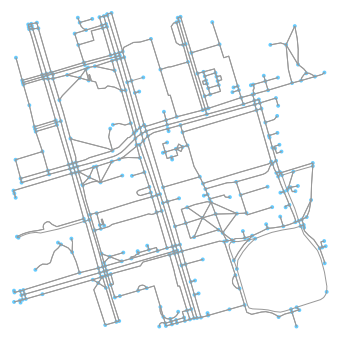

In [50]:
fig, ax = ox.plot_graph(G)

In [52]:
# here are the nodes
[*G.nodes()]

[130170945,
 2557542523,
 2557542526,
 2143404200,
 2143404199,
 306725181,
 306725184,
 2498969982,
 2498969984,
 340165033,
 390545921,
 60654119,
 60654120,
 60654129,
 774054381,
 389677890,
 389677891,
 389677892,
 389677893,
 389677894,
 389677896,
 389677901,
 389677902,
 389677903,
 389677904,
 389677905,
 389677906,
 389677907,
 389678001,
 389678002,
 389678003,
 389678004,
 389678005,
 389678007,
 389678008,
 389678009,
 389678012,
 389678013,
 389678015,
 389678016,
 389678025,
 389678026,
 389678027,
 389678028,
 389678029,
 389678032,
 389678033,
 389678034,
 389678036,
 389678037,
 389678054,
 389678111,
 389678112,
 389678113,
 389678122,
 389678121,
 389678124,
 389678145,
 389678146,
 389678150,
 389678151,
 389678157,
 389678158,
 389678159,
 389678160,
 389678162,
 389678161,
 389678172,
 389678174,
 389678175,
 389678176,
 389678177,
 389678180,
 389678181,
 389678182,
 389678185,
 389678186,
 389678187,
 389678188,
 389678189,
 389678190,
 389678191,
 389678192,
 

In [61]:
# this will take a while
# this can come in handy in a lot of case studies
for distance_to_others in itertools.islice(nx.all_pairs_shortest_path(G), 5): # we will take only five
    print(distance_to_others)

(130170945, {130170945: [130170945], 55808527: [130170945, 55808527], 389677905: [130170945, 389677905], 127284680: [130170945, 127284680], 127284677: [130170945, 127284677], 55808564: [130170945, 55808527, 55808564], 55808512: [130170945, 55808527, 55808512], 2143434279: [130170945, 55808527, 2143434279], 3996671926: [130170945, 389677905, 3996671926], 389678182: [130170945, 389677905, 389678182], 2143468182: [130170945, 55808527, 55808564, 2143468182], 55808518: [130170945, 55808527, 55808564, 55808518], 55808451: [130170945, 55808527, 55808512, 55808451], 3996671921: [130170945, 389677905, 3996671926, 3996671921], 389677904: [130170945, 389677905, 3996671926, 389677904], 3996671930: [130170945, 389677905, 3996671926, 3996671930], 389678181: [130170945, 389677905, 389678182, 389678181], 389677906: [130170945, 389677905, 389678182, 389677906], 2143468197: [130170945, 55808527, 55808564, 2143468182, 2143468197], 2143468186: [130170945, 55808527, 55808564, 2143468182, 2143468186], 30672